In [1]:
library(foreign)
library(dplyr)
library(ggplot2)
library(readxl)



Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
raw_data<-read.spss("C:/Users/admin/Desktop/Big_data/R/Miniproject_200818/koweps_hp01_14_long_beta1.sav", to.data.frame=T)

Warning message in read.spss("C:/Users/admin/Desktop/Big_data/R/Miniproject_200818/koweps_hp01_14_long_beta1.sav", :
"C:/Users/admin/Desktop/Big_data/R/Miniproject_200818/koweps_hp01_14_long_beta1.sav: Very long string record(s) found (record type 7, subtype 14), each will be imported in consecutive separate variables"

In [3]:
data<-raw_data

In [82]:
dim(raw_data)

[1] 230679   2506

In [4]:
data <- rename(data, 
               sex = h_g3, 
               Year = h_g4, 
               work_type = np06_9, 
               cert1 = np06_28, 
               cert2 = np06_29,
               cert3 = np06_30)

In [5]:
class(data$Year)

[1] "numeric"

In [6]:
data$sex <- ifelse(data$sex == 1, 'male', 'female')
data$Year <- ifelse((17 < data$year-data$Year) & (data$year-data$Year) < 35, 
                     data$year, NA)

In [7]:
table(data$sex)
table(data$Year)


female   male 
124552 106127 


2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
3807 3347 3131 2932 2741 2507 2941 2832 2645 2532 2413 2310 2228 2145 

In [8]:
reg_data <- data %>%
    filter(!is.na(sex) &!is.na(Year) &!is.na(work_type))
cert_data <- data %>%
    filter(!is.na(sex) &!is.na(Year) 
           &!is.na(cert1) &!is.na(cert2) &!is.na(cert3))

In [9]:
head(reg_data)
head(cert_data)

h_merkey,h_pid,year,wv,wv_num,first_wv,last_wv,p_wsl,p_wsc,p_wgl,...,c05_34,c05_35,c05_37,c05_39,c05_41,c05_43,c05_45,c05_47,c05_49,release_date
50101,503,2005,1,1,1,1,0.5955199,0.5955199,1485.6865,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
150101,1501,2005,1,14,1,14,0.3304359,0.3304359,824.3622,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
150101,1502,2005,1,14,1,14,0.3304359,0.3304359,824.3622,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
200101,2001,2005,1,14,1,14,0.9704437,0.9704437,2421.0361,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
200101,2002,2005,1,14,1,14,0.9704437,0.9704437,2421.0361,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
200901,2051,2015,11,4,11,14,0.0000000,0.5899945,0.0000,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407


h_merkey,h_pid,year,wv,wv_num,first_wv,last_wv,p_wsl,p_wsc,p_wgl,...,c05_34,c05_35,c05_37,c05_39,c05_41,c05_43,c05_45,c05_47,c05_49,release_date
1190101,11904,2011,7,10,1,10,1.1900939,1.1395051,4058.220,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
1600101,16002,2005,1,4,1,4,1.8091685,1.8091685,4513.463,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
2320101,23202,2005,1,2,1,2,1.0756211,1.0756210,2683.430,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
2430101,24303,2005,1,7,1,11,0.9148793,0.9148793,2282.415,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
2480101,24801,2005,1,14,1,14,1.7169844,1.7169844,4283.485,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407
3610101,36104,2005,1,14,1,14,1.6784140,1.6784140,4187.260,...,NA,NA,NA,NA,NA,NA,NA,NA,NA,200407


 1) 이상치 확인
 2) 데이터 가공(나이 / 성별)

In [10]:
table(data$sex)
table(data$Year)
table(data$work_type)
table(data$cert1)
table(data$cert2)
table(data$cert3)


female   male 
124552 106127 


2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 
3807 3347 3131 2932 2741 2507 2941 2832 2645 2532 2413 2310 2228 2145 


   1    2    3    4    5    9 
6659 5798  347 3823 1969   53 


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
480  37 342 124  17  21  92 330   1 557  11  32  17  33  22  30  58  23 126  38 
 21  22  23  24  25  26  27  28  99 
314 196 243 440  53 517  44 220  20 


  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18  19  20 
 64  10  37  34   1   3   4  28   1 118   2   6   4  10   6   8  44  11  19   8 
 21  22  23  24  25  26  27  28  99 
121  35  14  44  13  51  16  42  21 


 1  2  3  4  7  8  9 10 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 99 
13  2  4  4  1  5  1 24  2  1  1  2  2 11  3  6  3 38  6  1  9  5 10  1 17 10 

## 1. reg_data

In [11]:
reg_data$work_type <- ifelse(reg_data$work_type == 9, NA, reg_data$work_type)

In [12]:
reg_data <- reg_data %>%
    filter(!is.na(work_type)) %>%
    select(sex, Year, work_type)
reg_data

sex,Year,work_type
male,2005,1
male,2005,1
female,2005,1
male,2005,3
male,2005,1
female,2015,1
female,2005,2
male,2005,1
female,2005,1
female,2005,1


In [13]:
dim(reg_data)

[1] 4917    3

In [14]:
summary(reg_data)

     sex                 Year        work_type   
 Length:4917        Min.   :2005   Min.   :1.00  
 Class :character   1st Qu.:2005   1st Qu.:1.00  
 Mode  :character   Median :2005   Median :2.00  
                    Mean   :2008   Mean   :1.71  
                    3rd Qu.:2011   3rd Qu.:2.00  
                    Max.   :2018   Max.   :5.00  

In [15]:
reg_data

sex,Year,work_type
male,2005,1
male,2005,1
female,2005,1
male,2005,3
male,2005,1
female,2015,1
female,2005,2
male,2005,1
female,2005,1
female,2005,1


### 1. 연도에 따른 정규직 비율

In [16]:
reg_data$work_type <- ifelse(reg_data$work_type == 1, 'irregular', 
                    ifelse(reg_data$work_type == 2, 'regular', NA))

In [17]:
table(reg_data)

, , work_type = irregular

        Year
sex      2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
  female  587   20   47   47   56   45  133   34   40   37   33   19   21   31
  male    450   30   65   57   39   40   96   40   35   28   43   21   21   14

, , work_type = regular

        Year
sex      2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018
  female  902   18   49   35   37   18  151   24   22   16   22   22   10   13
  male    687   14   57   37   31   20  119   19   24   25   24   20   24   16


In [18]:
length(reg_data$work_type == 1)

[1] 4917

In [19]:
reg_pct_data <- reg_data %>%
    filter(!is.na(reg_data$work_type)) %>%
    group_by(Year, work_type) %>%
    summarise(n = n()) %>%
    mutate(total = sum(n)) %>%
    mutate(pct = n/total*100)
head(reg_pct_data)

Year,work_type,n,total,pct
2005,irregular,1037,2626,39.48972
2005,regular,1589,2626,60.51028
2006,irregular,50,82,60.97561
2006,regular,32,82,39.02439
2007,irregular,112,218,51.37615
2007,regular,106,218,48.62385


In [20]:
irr_pct <- reg_pct_data %>%
    filter(work_type == 'irregular') %>%
    select(Year, pct)
head(irr_pct)

Year,pct
2005,39.48972
2006,60.97561
2007,51.37615
2008,59.09091
2009,58.28221
2010,69.10569


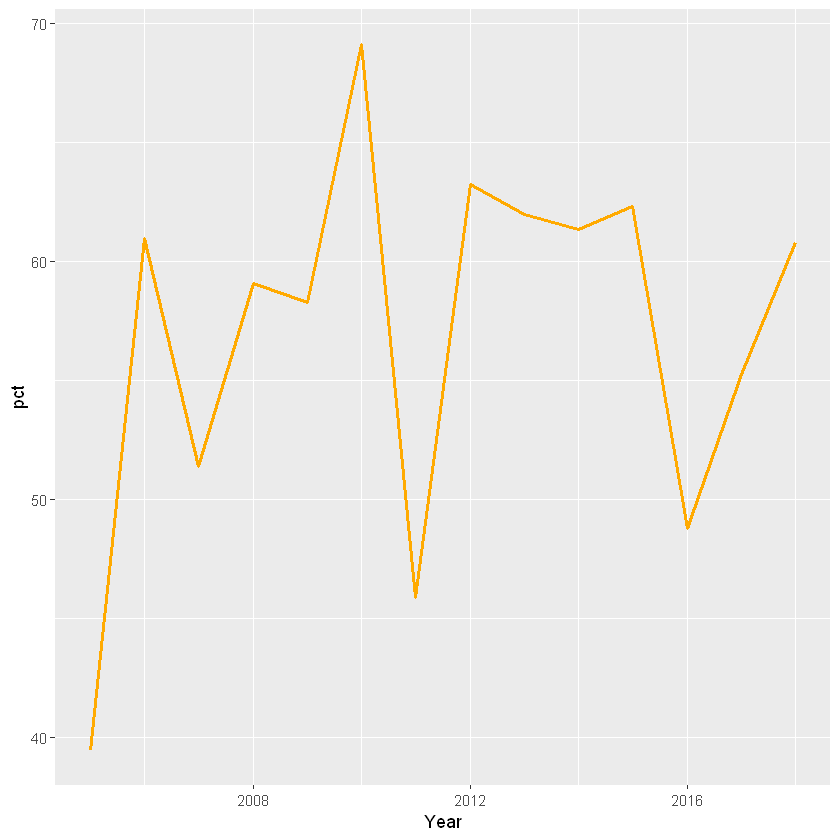

In [21]:
irr <-ggplot(irr_pct, aes(x=Year, y=pct)) +
    geom_line(color='#FFAA00', lwd=1)
irr

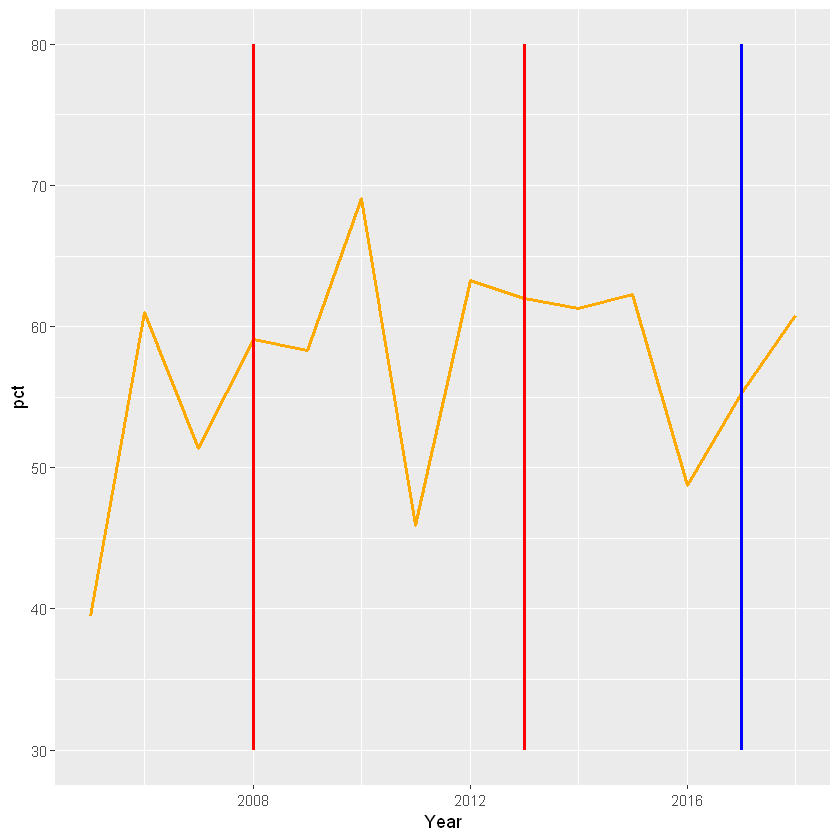

In [22]:
irr + geom_segment(aes(x=2008, y=30, xend=2008, yend=80), colour="red", size=1) +
    geom_segment(aes(x=2013, y=30, xend=2013, yend=80), colour="red", size=1) +
    geom_segment(aes(x=2017, y=30, xend=2017, yend=80), colour="blue", size=1)

#### 청년 고용동향 분석(고용률, 실업률)
##### 고용노동부 e-나라지표 참조

In [23]:
irr_pct

Year,pct
2005,39.48972
2006,60.97561
2007,51.37615
2008,59.09091
2009,58.28221
2010,69.10569
2011,45.89178
2012,63.24786
2013,61.98347
2014,61.32075


In [30]:
irr_pct$emp <- c(45, 44.8, 43.2, 41.9, 40.6, 40.4, 40.4, 40.3, 39.5, 40.5, 41.2, 41.7, 42.1, 42.7)

In [31]:
irr_pct$unemp <- c(8.0, 7.9, 7.2, 7.1, 8.0, 7.9, 7.6, 7.5, 8, 9, 9.1, 9.8, 9.8, 9.5)

In [50]:
irr_pct

Year,pct,emp,unemp
2005,39.48972,45.0,8.0
2006,60.97561,44.8,7.9
2007,51.37615,43.2,7.2
2008,59.09091,41.9,7.1
2009,58.28221,40.6,8.0
2010,69.10569,40.4,7.9
2011,45.89178,40.4,7.6
2012,63.24786,40.3,7.5
2013,61.98347,39.5,8.0
2014,61.32075,40.5,9.0


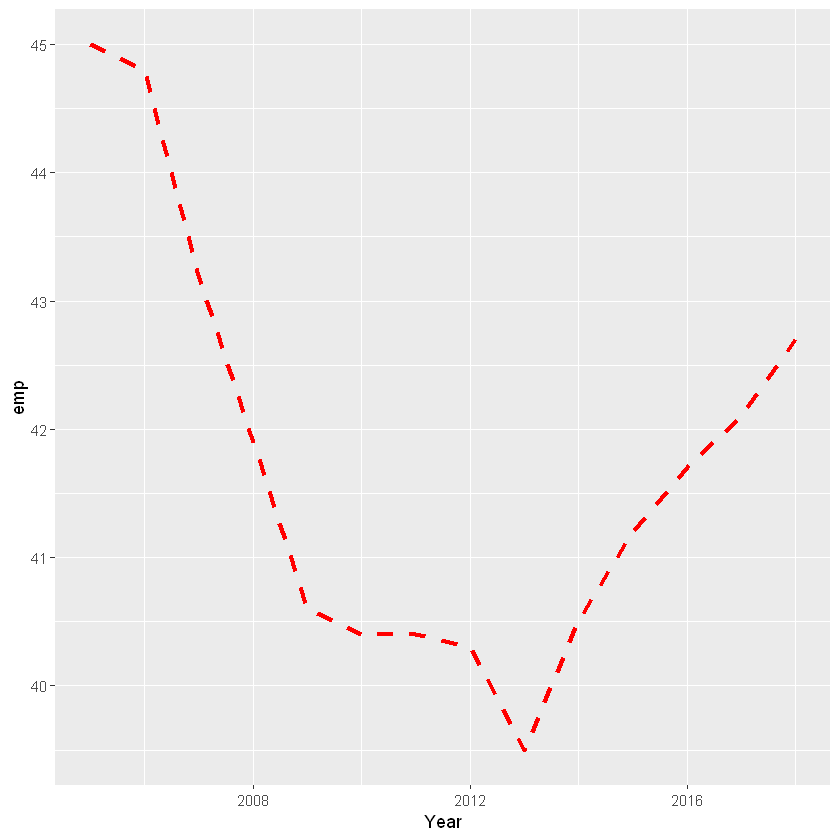

In [45]:
gr_irr <- ggplot(irr_pct, aes(x=Year, y=emp)) + geom_line(linetype='dashed', color="red", size=1.2)
gr_irr

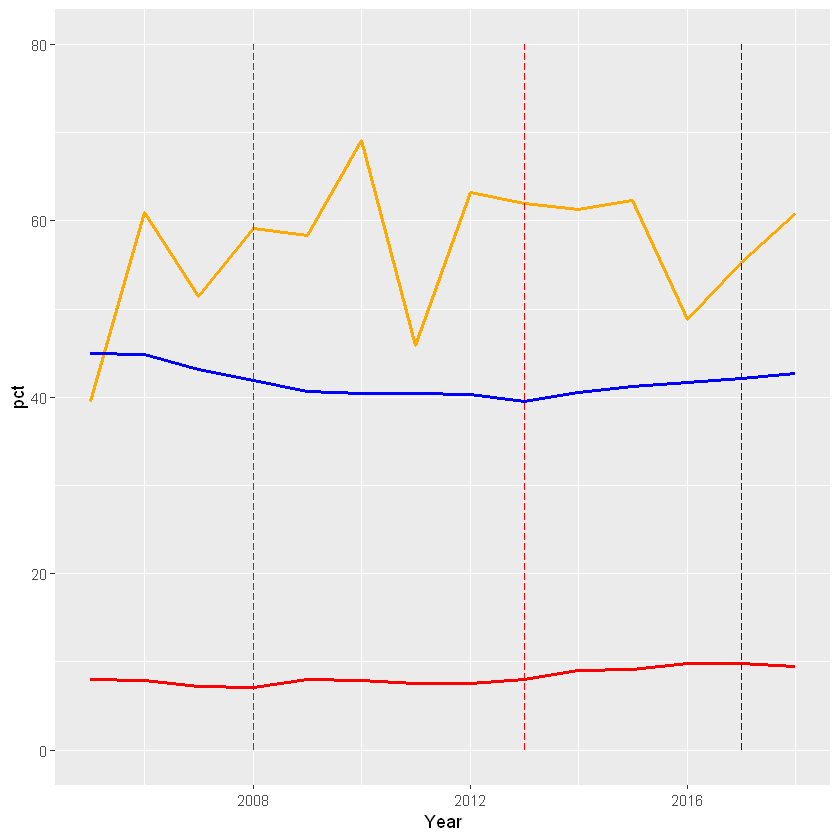

In [81]:
ggplot(data = irr_pct) +
    geom_line(aes(x=Year, y=pct), color='#FFAA00', lwd=1) +
    geom_line(aes(x=Year, y=emp), color='BLUE', lwd=1) +
    geom_line(aes(x=Year, y=unemp), color='RED', lwd=1) +
    geom_segment(aes(x=2008, y=0, xend=2008, yend=80), colour="red", size=0.3, linetype=5) +
    geom_segment(aes(x=2013, y=0, xend=2013, yend=80), colour="red", size=0.3, linetype=5) +
    geom_segment(aes(x=2017, y=0, xend=2017, yend=80), colour="blue", size=0.3, linetype=5) +
    theme(legend.position = 'top')